# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# How do I know if the code is running (step by step) if it's within a for loop
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "APPID=" + weather_api_key + "&units=metric" + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    # WHAT AM I DOING CORRECTLY HERE AND WHAT AM I DOING INCORRECTLY
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | conde
Processing Record 3 of Set 1 | ancud
Processing Record 4 of Set 1 | acapulco
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | fortuna
Processing Record 7 of Set 1 | cayenne
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | yantai
Processing Record 10 of Set 1 | klaksvik
Processing Record 11 of Set 1 | cairns
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | gazimurskiy zavod
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | lakki marwat
Processing Record 18 of Set 1 | bathsheba
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | qazvin
Processing Record 22 of Set 1 | ugoofaaru
Processing Record 23 of

Processing Record 38 of Set 4 | viransehir
Processing Record 39 of Set 4 | balfour
Processing Record 40 of Set 4 | kiruna
Processing Record 41 of Set 4 | ambilobe
Processing Record 42 of Set 4 | banda aceh
Processing Record 43 of Set 4 | berdigestyakh
Processing Record 44 of Set 4 | komsomolskiy
Processing Record 45 of Set 4 | petatlan
Processing Record 46 of Set 4 | kaili
Processing Record 47 of Set 4 | xai-xai
Processing Record 48 of Set 4 | itarema
Processing Record 49 of Set 4 | suao
City not found. Skipping...
Processing Record 0 of Set 5 | yuanping
Processing Record 1 of Set 5 | yar-sale
Processing Record 2 of Set 5 | mareeba
Processing Record 3 of Set 5 | castro
Processing Record 4 of Set 5 | tacoronte
Processing Record 5 of Set 5 | lavrentiya
Processing Record 6 of Set 5 | champoton
Processing Record 7 of Set 5 | dikson
Processing Record 8 of Set 5 | sturgeon bay
Processing Record 9 of Set 5 | chumikan
Processing Record 10 of Set 5 | banff
Processing Record 11 of Set 5 | corren

Processing Record 29 of Set 8 | soyo
Processing Record 30 of Set 8 | manggar
Processing Record 31 of Set 8 | savannah bight
Processing Record 32 of Set 8 | independence
Processing Record 33 of Set 8 | ostrovnoy
Processing Record 34 of Set 8 | sao joao da barra
Processing Record 35 of Set 8 | port blair
Processing Record 36 of Set 8 | the valley
Processing Record 37 of Set 8 | shubarshi
Processing Record 38 of Set 8 | kytlym
City not found. Skipping...
Processing Record 39 of Set 8 | lardos
Processing Record 40 of Set 8 | erzin
Processing Record 41 of Set 8 | maxixe
Processing Record 42 of Set 8 | poum
Processing Record 43 of Set 8 | neiafu
Processing Record 44 of Set 8 | a coruna
Processing Record 45 of Set 8 | huangmei
Processing Record 46 of Set 8 | chapada dos guimaraes
Processing Record 47 of Set 8 | lazarev
Processing Record 48 of Set 8 | upernavik
Processing Record 49 of Set 8 | aden
Processing Record 0 of Set 9 | namibe
Processing Record 1 of Set 9 | launceston
Processing Record

Processing Record 16 of Set 12 | morehead
Processing Record 17 of Set 12 | tynda
Processing Record 18 of Set 12 | wewak
Processing Record 19 of Set 12 | sitka
Processing Record 20 of Set 12 | svetlogorsk
Processing Record 21 of Set 12 | xinxiang
Processing Record 22 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 23 of Set 12 | harper
Processing Record 24 of Set 12 | zapolyarnyy
Processing Record 25 of Set 12 | imeni poliny osipenko
Processing Record 26 of Set 12 | inirida
Processing Record 27 of Set 12 | saleaula
City not found. Skipping...
Processing Record 28 of Set 12 | sun valley
Processing Record 29 of Set 12 | nedjo
Processing Record 30 of Set 12 | vestmanna
Processing Record 31 of Set 12 | kahului
Processing Record 32 of Set 12 | oksfjord
Processing Record 33 of Set 12 | caravelas
Processing Record 34 of Set 12 | merauke
Processing Record 35 of Set 12 | diego de almagro
Processing Record 36 of Set 12 | samarai
Processing Record 37 of Set 12 | whyalla
Processin

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [7]:
city_weather

{'coord': {'lon': 46.4667, 'lat': 14.4},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 22.96,
  'feels_like': 22.88,
  'temp_min': 22.96,
  'temp_max': 22.96,
  'pressure': 1012,
  'humidity': 60,
  'sea_level': 1012,
  'grnd_level': 888},
 'visibility': 10000,
 'wind': {'speed': 7.5, 'deg': 230, 'gust': 10.72},
 'rain': {'1h': 0.81},
 'clouds': {'all': 94},
 'dt': 1680213644,
 'sys': {'country': 'YE', 'sunrise': 1680231046, 'sunset': 1680275151},
 'timezone': 10800,
 'id': 72181,
 'name': 'Marzuq',
 'cod': 200}

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,6.81,53,20,4.12,AR,1680213526
1,conde,-7.2597,-34.9075,25.70,83,0,3.60,BR,1680213537
2,ancud,-41.8697,-73.8203,10.87,66,87,1.86,CL,1680213538
3,acapulco,16.8634,-99.8901,29.90,66,75,5.66,MX,1680213538
4,rikitea,-23.1203,-134.9692,26.19,72,94,2.15,PF,1680213355


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,6.81,53,20,4.12,AR,1680213526
1,conde,-7.2597,-34.9075,25.70,83,0,3.60,BR,1680213537
2,ancud,-41.8697,-73.8203,10.87,66,87,1.86,CL,1680213538
3,acapulco,16.8634,-99.8901,29.90,66,75,5.66,MX,1680213538
4,rikitea,-23.1203,-134.9692,26.19,72,94,2.15,PF,1680213355


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

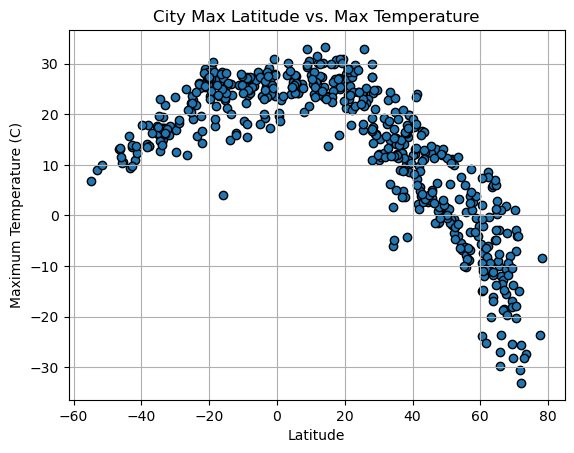

In [54]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, marker = "o", edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Max Temperature")
plt.ylabel("Maximum Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

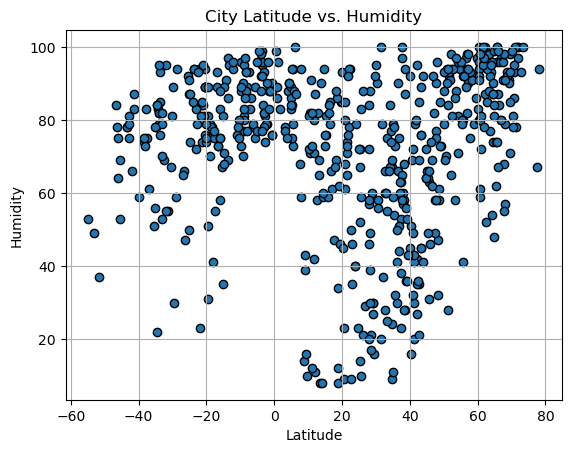

In [55]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, marker = "o", edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

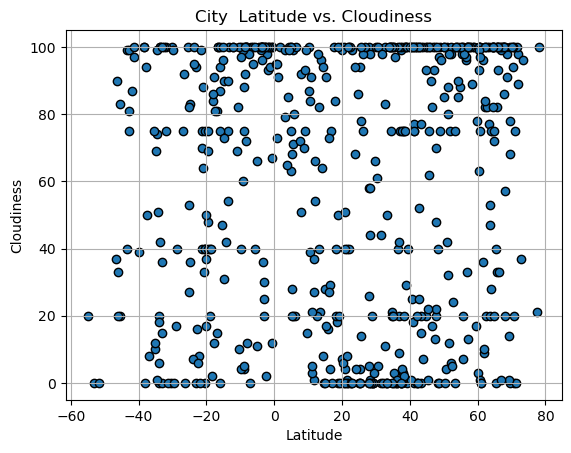

In [56]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, marker = "o", edgecolors = "black")

# Incorporate the other graph properties
plt.title("City  Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

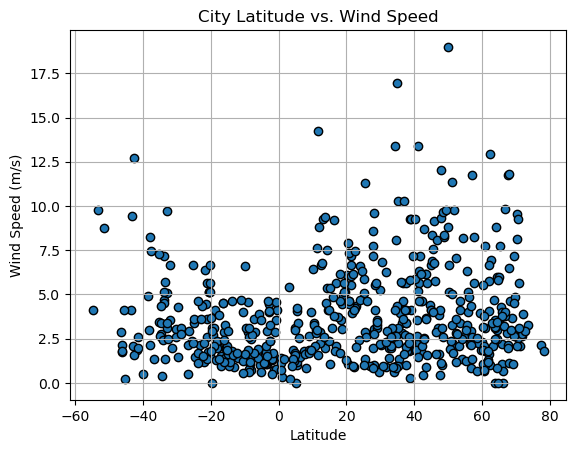

In [57]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, marker = "o", edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

#FIX axis labels and work on line regression labels

In [20]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,acapulco,16.8634,-99.8901,29.90,66,75,5.66,MX,1680213538
5,fortuna,40.5982,-124.1573,12.18,69,25,2.24,US,1680213538
6,cayenne,4.9333,-52.3333,27.02,83,75,3.09,GF,1680213538
8,yantai,37.5333,121.4000,9.04,38,0,3.41,CN,1680213539
9,klaksvik,62.2266,-6.5890,8.51,98,100,12.96,FO,1680213539


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,6.81,53,20,4.12,AR,1680213526
1,conde,-7.2597,-34.9075,25.70,83,0,3.60,BR,1680213537
2,ancud,-41.8697,-73.8203,10.87,66,87,1.86,CL,1680213538
4,rikitea,-23.1203,-134.9692,26.19,72,94,2.15,PF,1680213355
7,cape town,-33.9258,18.4232,17.29,79,20,7.20,ZA,1680213279


###  Temperature vs. Latitude Linear Regression Plot

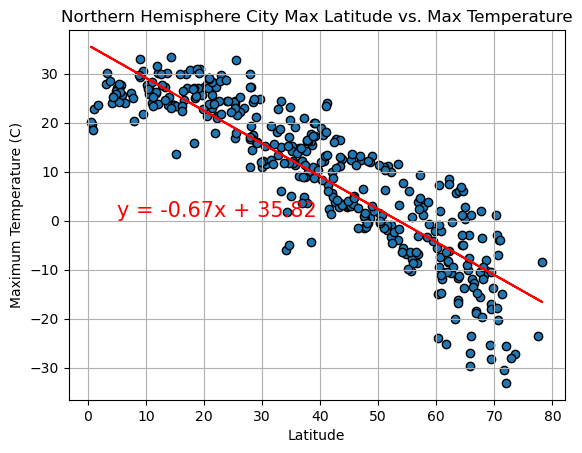

In [46]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolors = "black")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq, (5.0, 0.8), fontsize=15, color = "red")

# Incorporate the other graph properties
plt.title("Northern Hemisphere City Max Latitude vs. Max Temperature")
plt.ylabel("Maximum Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

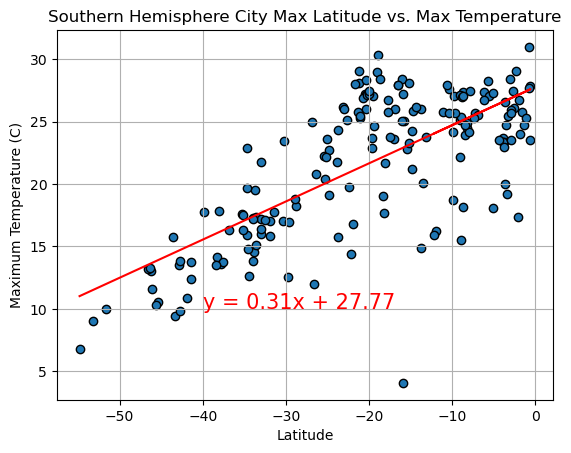

In [47]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolors = "black")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq, (-40, 10), fontsize=15, color = "red")

# Incorporate the other graph properties
plt.title("Southern Hemisphere City Max Latitude vs. Max Temperature")
plt.ylabel("Maximum Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

Discussion about the linear relationship: While correlation does not imply causation, the correlation here is a logical one. In both plots, it is clear that the closer the latitude is to 0, the higher the temperature for that city. This makes sense because as the earth rotates, the equator is the location that consistently receives the most direct sunlight, causing more of the sun's energy to warm these areas. Conversely, cities further away from the equator, due to the rotation on the earth's axis, receive less direct sunlight and have more varying temperatures, climates and subsequently seasons. The correlation seems particular strong in the Northern Hemisphere, as the cities are are closely tied to the regression line, but still show correlation in the Southern Hemisphere as well.

### Humidity vs. Latitude Linear Regression Plot

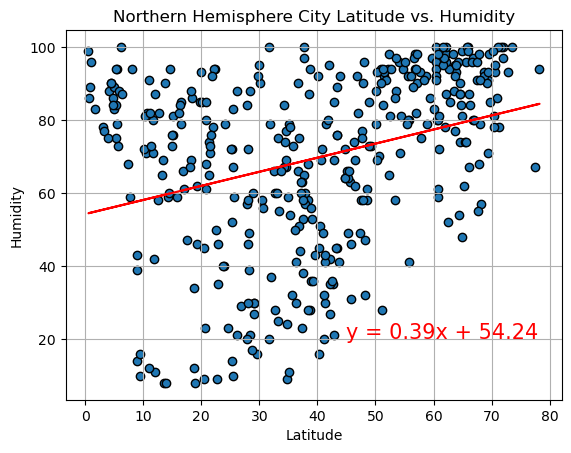

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolors = "black")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq, (45.0, 20), fontsize=15, color = "red")

# Incorporate the other graph properties
plt.title("Northern Hemisphere City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

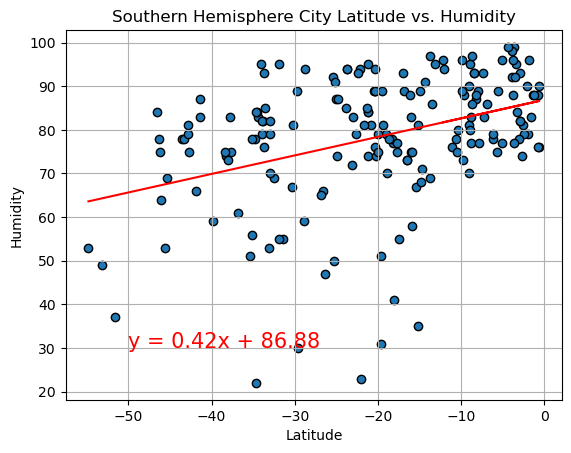

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolors = "black")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq, (-50, 30), fontsize=15, color = "red")

# Incorporate the other graph properties
plt.title("Southern Hemisphere City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

Discussion about the linear relationship: The correlation between latitude and humidity is similar to that of latitude and temperature. In both plots, it is clear that the closer the latitude is to 0, the higher the humidity for that city. As with temperature, the equator receives the most direct sunlight on Earth, causing more of the sun's energy to warm these areas. In addition to elevating the temperature, it is more likely to cause excess water to evaporate into the air and cause higher humidity levels. However, it is worth noting that the correlation does not seem as strong as the temperature. The points are much more scattered and there seems to be a wider degree of variability, particularly in the Northern Hemisphere. This makes sense because many other factors contribute to humidity aside from temperature. It depends on the topgraphy, proximity to water, elevation etc.

### Cloudiness vs. Latitude Linear Regression Plot

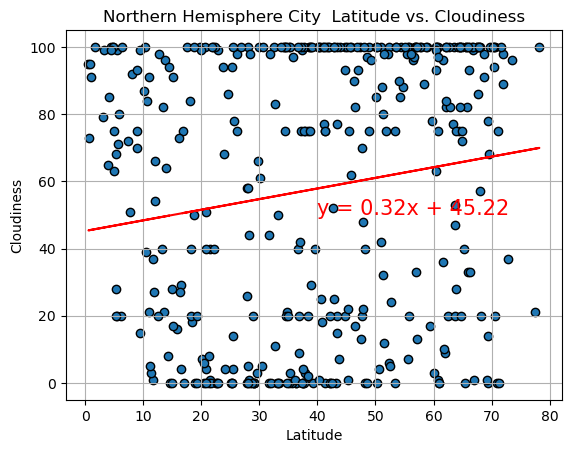

In [50]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolors = "black")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq, (40, 50), fontsize=15, color = "red")

# Incorporate the other graph properties
plt.title("Northern Hemisphere City  Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()


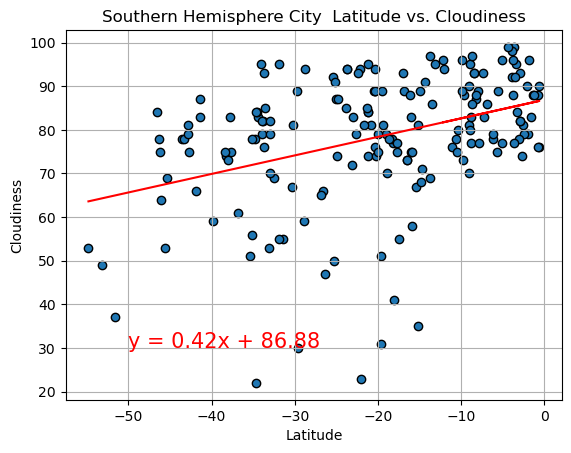

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolors = "black")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq, (-50, 30.0), fontsize=15, color = "red")

# Incorporate the other graph properties
plt.title("Southern Hemisphere City  Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

Discussion about the linear relationship: While we were able to plot a linear regression, I do not believe there is a strong correlation between a city's latitude and the cloudiness. This is because, in particular for the Northern Hemisphere, there are a lot of cities with zero cloudiness or significant cloudiness, across latitude. The correlation is a little more pronounced in the Southern Hemisphere but still not substantial. While the equator does receive the most sunlight, causing warmer temperature and higher humidity, and this could lead to cloudiness, it is not always the case. As previously stated, a lot of factors can contribute to humidity, as with cloudiness, aside from temperature. In short, there is a linear regress to plot but the correlation does not imply causation in this comparisons. 

### Wind Speed vs. Latitude Linear Regression Plot

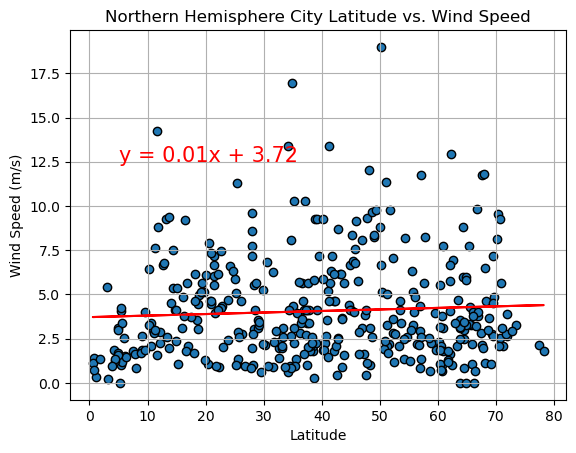

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolors = "black")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq, (5.0, 12.5), fontsize=15, color = "red")

# Incorporate the other graph properties
plt.title("Northern Hemisphere City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

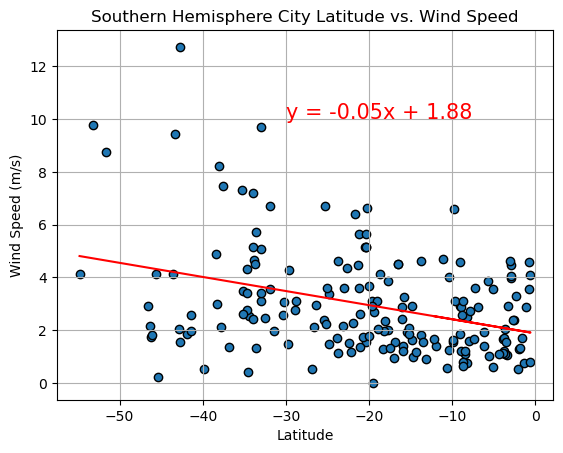

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolors = "black")
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq, (-30.0, 10), fontsize=15, color = "red")

# Incorporate the other graph properties
plt.title("Southern Hemisphere City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

Discussion about the linear relationship: As with all of the other graphs, we have been able to plot a linear regression line. However, unlike the comparison between latitude and cloudiness, it is clear that there is no correlation between Wind Speed and Latitude. In the Northern Hemisphere, the slope was 0.01 and in the Southern Hemisphere, the slope was 0.05. That is essentially no slope, and therefore there seems to be no relationship between Wind Speed and Latitude.